In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,091 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# *train/test set*

In [3]:
west2 = pd.read_csv('/content/drive/MyDrive/data/data2/wes with month.csv',encoding = 'euc-kr')
cen2 = pd.read_csv('/content/drive/MyDrive/data/data2/cen with month.csv',encoding = 'euc-kr')
nor2 = pd.read_csv('/content/drive/MyDrive/data/data2/nor with month.csv',encoding = 'euc-kr')

In [4]:
testwest = pd.read_csv('/content/drive/MyDrive/data/data2/west21.csv', encoding = 'euc-kr')
testcen = pd.read_csv('/content/drive/MyDrive/data/data2/cen21.csv', encoding = 'euc-kr')
testnor = pd.read_csv('/content/drive/MyDrive/data/data2/nor21.csv', encoding = 'euc-kr')

## train set

In [5]:
west2 = west2[(west2['종류'] == '콩정선기') |
              (west2['종류'] == '농산물탈피기') |
              (west2['종류'] == '모우어') |
              (west2['종류'] == '잔가지파쇄기')]

In [6]:
nor2 = nor2[(nor2['종류'] == '콩정선기')|
            (nor2['종류'] == '농산물탈피기')|
            (nor2['종류'] == '모우어')|
            (nor2['종류'] == '보행경운기')|
            (nor2['종류'] == '잔가지파쇄기')]

In [7]:
cen2 = cen2[(cen2['종류'] == '콩정선기')|(cen2['종류'] == '동력예취기')|(cen2['종류'] == '그레이더')|
            (cen2['종류'] == '농산물탈피기')|(cen2['종류'] == '농업용고소작업차')|(cen2['종류'] == '농업용동력운반차')|
            (cen2['종류'] == '동력분무기')|(cen2['종류'] == '동력파종기')|(cen2['종류'] == '보행경운기')|
            (cen2['종류'] == '승용관리기')|(cen2['종류'] == '잔가지파쇄기')|(cen2['종류'] == '곡물정선기')]

In [8]:
# west2.info()

## test set

In [9]:
testwest = testwest[(testwest['종류'] == '콩정선기') |
              (testwest['종류'] == '농산물탈피기') |
              (testwest['종류'] == '모우어') |
              (testwest['종류'] == '잔가지파쇄기')]

In [10]:
testnor = testnor[(testnor['종류'] == '콩정선기')|
            (testnor['종류'] == '농산물탈피기')|
            (testnor['종류'] == '모우어')|
            (testnor['종류'] == '보행경운기')|
            (testnor['종류'] == '잔가지파쇄기')]

In [11]:
testcen = testcen[(testcen['종류'] == '콩정선기')|(testcen['종류'] == '동력예취기')|(testcen['종류'] == '그레이더')|
            (testcen['종류'] == '농산물탈피기')|(testcen['종류'] == '농업용고소작업차')|(testcen['종류'] == '농업용동력운반차')|
            (testcen['종류'] == '동력분무기')| (testcen['종류'] == '동력파종기')|(testcen['종류'] == '보행경운기')|
            (testcen['종류'] == '승용관리기')|(testcen['종류'] == '잔가지파쇄기')|(testcen['종류'] == '곡물정선기')]

In [12]:
# testwest.info()

In [13]:
testwest['month'] = testwest['date'].str.split('-').str[1] 
testwest['month'] = testwest['month'].astype('int')

In [14]:
testnor['month'] = testnor['date'].str.split('-').str[1]
testnor['month'] = testnor['month'].astype('int')

In [15]:
testcen['month'] = testcen['date'].str.split('-').str[1]
testcen['month'] = testcen['month'].astype('int')

In [16]:
# testwest.head(1)

In [17]:
# testnor.head(1)

In [18]:
# testcen.head(1)

# *module & etc*

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from subprocess import check_call
from sklearn import tree

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [20]:
from sklearn.metrics import mean_squared_error as MSE

In [21]:
# 하이퍼파라미터 튜닝
def rmse(p,a):
    difference=p-a
    squared=difference**2
    mean=squared.mean()
    score=np.sqrt(mean)
    return score

rmse_scorer = make_scorer(rmse, greater_is_better=False)
rmse_scorer

make_scorer(rmse, greater_is_better=False)

# *minmax normalization*

- minmaxscaler
- standard

- 서부
- 북부
- 중앙

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

## 서부
- 4개에 대해서 ^각가^ 모델핏

In [23]:
# west2 종류에 대해서 딕셔너리 만들기
west_dic = {'west1' : '농산물탈피기',
            'west2' : '모우어',
            'west3' : '잔가지파쇄기',
            'west4' : '콩정선기'}

In [ ]:
# west2[west2['date'] == '2018-01-02']

,Unnamed: 0,date,종류,건수,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일사량(MJ/m2),month
4380,4380,2018-01-02,농산물탈피기,0.0,-0.5,0.0,2.0,54.0,7.92,1
18615,18615,2018-01-02,모우어,0.0,-0.5,0.0,2.0,54.0,7.92,1
26280,26280,2018-01-02,잔가지파쇄기,0.0,-0.5,0.0,2.0,54.0,7.92,1
29565,29565,2018-01-02,콩정선기,2.0,-0.5,0.0,2.0,54.0,7.92,1


In [ ]:
# west2.shape

(4380, 10)

### 서부 분소의 total train set : west_train

In [24]:
# 서부 분소의 train set X(입력변수만) 정의
west_train_X = pd.DataFrame(scaler.fit_transform(X = west2.iloc[:,4:], y = west2[['건수']])) #입력 변수만 정규화함
west_train_X.columns = ['평균기온', '일강수량', '평균풍속', '평균상대습도', '합계일사량', 'month']

In [ ]:
west_train_X

* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
- y 변수는 정규화하지 않은 근거 : y = none (y는 정규화에서 제외함)

* 서부 분소의 train set 만들기

In [25]:
west_train_X = west_train_X.reset_index()

tmp_west = west2[['종류','건수']].reset_index().reset_index()
tmp_west.drop(columns = ['index'], axis = 1,inplace = True)
tmp_west.rename(columns = {'level_0' : 'index'}, inplace = True)

west_train = pd.concat([tmp_west, west_train_X], axis = 1)
west_train

,index,종류,건수,index,평균기온,일강수량,평균풍속,평균상대습도,합계일사량,month
0,0,농산물탈피기,0.0,0,0.254587,0.00000,0.36,0.402597,0.253197,0.0
1,1,농산물탈피기,0.0,1,0.217890,0.00000,0.34,0.180519,0.351982,0.0
2,2,농산물탈피기,1.0,2,0.208716,0.00000,0.10,0.309091,0.314898,0.0
3,3,농산물탈피기,0.0,3,0.252294,0.00000,0.32,0.316883,0.313619,0.0
4,4,농산물탈피기,0.0,4,0.238532,0.00000,0.32,0.306494,0.355179,0.0
...,...,...,...,...,...,...,...,...,...,...
4375,4375,콩정선기,0.0,4375,0.272936,0.00000,0.08,0.767532,0.159847,1.0
4376,4376,콩정선기,1.0,4376,0.307339,0.00000,0.06,0.689610,0.000000,1.0
4377,4377,콩정선기,1.0,4377,0.295872,0.00203,0.22,0.689610,0.201087,1.0
4378,4378,콩정선기,1.0,4378,0.087156,0.00000,0.88,0.209091,0.360294,1.0


### 서부분소의 total test set : west_test

In [26]:
# 정규화
west_test_X = pd.DataFrame(scaler.fit_transform(X= testwest.iloc[:,3:], y = testwest[['건수']]))
west_test_X.columns = ['평균기온', '일강수량', '평균풍속', '평균상대습도', '합계일사량', 'month']
west_test_X = west_test_X.reset_index()
#
tmp_west_test = testwest[['종류','건수']].reset_index().reset_index()
tmp_west_test.drop(columns = ['index'], axis = 1,inplace = True)
tmp_west_test.rename(columns = {'level_0' : 'index'}, inplace = True)

west_test = pd.concat([tmp_west_test, west_test_X], axis = 1)
# west_test

### *west1 에 대한 model fit*

In [ ]:
west_dic['west1']

'농산물탈피기'

In [ ]:
print(west_train['종류'].nunique(), west_test['종류'].nunique() )

4 4


In [ ]:
# west_train[west_train['종류'] == '농산물탈피기'].head(1)

west1_X = west_train[west_train['종류'] == '농산물탈피기'].iloc[:,4:]
west1_y = west_train[west_train['종류'] == '농산물탈피기'][['건수']]

In [ ]:
tree1 = DecisionTreeRegressor(random_state = 3)
tree1.fit(west1_X, west1_y)

DecisionTreeRegressor(random_state=3)

In [ ]:
parameters ={
    'max_depth':[3,5,7,9,10,11],
    'max_features':[0.1,0.3,0.5,0.7,0.9]
}

In [ ]:
west1_GS = GridSearchCV(tree1, param_grid=parameters, cv = 10, scoring=rmse_scorer)
west1_GS.fit(west1_X, west1_y)

west1_GS.best_params_

{'max_depth': 10, 'max_features': 0.1}

In [ ]:
tree1 = DecisionTreeRegressor(max_depth = 10, max_features = 0.1)
tree1.fit(west1_X, west1_y)

DecisionTreeRegressor(max_depth=10, max_features=0.1)

In [ ]:
west1_X_test = west_test[west_test['종류'] == '농산물탈피기'].iloc[:,4:]
west1_y_test = west_test[west_test['종류'] == '농산물탈피기']['건수']

In [ ]:
west1_ypred = tree1.predict(west1_X_test)

In [ ]:
MSE(west1_y_test, west1_ypred)

0.07429993345869843

In [ ]:
# text_representation = tree.export_text(tree1)
# text_representation

'|--- feature_4 <= 0.63\n|   |--- feature_0 <= 0.74\n|   |   |--- feature_5 <= 0.68\n|   |   |   |--- feature_1 <= 0.00\n|   |   |   |   |--- feature_4 <= 0.33\n|   |   |   |   |   |--- feature_2 <= 0.11\n|   |   |   |   |   |   |--- feature_2 <= 0.09\n|   |   |   |   |   |   |   |--- value: [0.00]\n|   |   |   |   |   |   |--- feature_2 >  0.09\n|   |   |   |   |   |   |   |--- feature_3 <= 0.38\n|   |   |   |   |   |   |   |   |--- value: [1.00]\n|   |   |   |   |   |   |   |--- feature_3 >  0.38\n|   |   |   |   |   |   |   |   |--- feature_5 <= 0.09\n|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.22\n|   |   |   |   |   |   |   |   |   |   |--- value: [1.00]\n|   |   |   |   |   |   |   |   |   |--- feature_0 >  0.22\n|   |   |   |   |   |   |   |   |   |   |--- value: [0.00]\n|   |   |   |   |   |   |   |   |--- feature_5 >  0.09\n|   |   |   |   |   |   |   |   |   |--- value: [0.00]\n|   |   |   |   |   |--- feature_2 >  0.11\n|   |   |   |   |   |   |--- value: [0.00]\

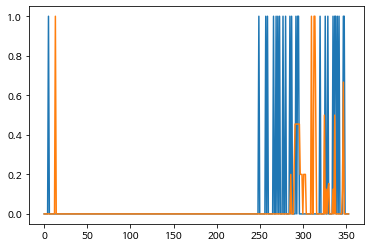

In [ ]:
# index = list(range(0,354))

# tmp = {'index' : index,
#        'value(y_test)' : west1_y_test.to_list(),
#        'pred' : list(west1_ypred)}

# tmp = pd.DataFrame(tmp)

# plt.plot('index', 'value(y_test)', data = tmp)
# plt.plot('index', 'pred', data = tmp)

## 서부분소 model fit 반복문
- train/ test normalization부터 모델fit 까지 전과정을 담음

In [31]:
# 서부 분소의 train set X(입력변수만) 정의
west_train_X = pd.DataFrame(scaler.fit_transform(X = west2.iloc[:,4:], y = west2[['건수']])) #입력 변수만 정규화함
west_train_X.columns = ['평균기온', '일강수량', '평균풍속', '평균상대습도', '합계일사량', 'month']

In [32]:
west_train_X = west_train_X.reset_index()

tmp_west = west2[['종류','건수']].reset_index().reset_index()
tmp_west.drop(columns = ['index'], axis = 1,inplace = True)
tmp_west.rename(columns = {'level_0' : 'index'}, inplace = True)

west_train = pd.concat([tmp_west, west_train_X], axis = 1)

In [33]:
# 정규화
west_test_X = pd.DataFrame(scaler.fit_transform(X= testwest.iloc[:,3:], y = testwest[['건수']]))
west_test_X.columns = ['평균기온', '일강수량', '평균풍속', '평균상대습도', '합계일사량', 'month']
west_test_X = west_test_X.reset_index()
#
tmp_west_test = testwest[['종류','건수']].reset_index().reset_index()
tmp_west_test.drop(columns = ['index'], axis = 1,inplace = True)
tmp_west_test.rename(columns = {'level_0' : 'index'}, inplace = True)

west_test = pd.concat([tmp_west_test, west_test_X], axis = 1)
west_test

,index,종류,건수,index,평균기온,일강수량,평균풍속,평균상대습도,합계일사량,month
0,0,콩정선기,0.0,0,0.194124,0.0,0.370201,0.466888,0.241767,0.0
1,1,모우어,0.0,1,0.194124,0.0,0.370201,0.466888,0.241767,0.0
2,2,잔가지파쇄기,0.0,2,0.194124,0.0,0.370201,0.466888,0.241767,0.0
3,3,농산물탈피기,0.0,3,0.194124,0.0,0.370201,0.466888,0.241767,0.0
4,4,잔가지파쇄기,0.0,4,0.208765,0.0,0.393784,0.328633,0.307245,0.0
...,...,...,...,...,...,...,...,...,...,...
1411,1411,농산물탈피기,0.0,1411,0.287207,0.0,0.471629,0.348605,0.272375,1.0
1412,1412,콩정선기,4.0,1412,0.377222,0.0,0.151688,0.471810,0.266951,1.0
1413,1413,모우어,0.0,1413,0.377222,0.0,0.151688,0.471810,0.266951,1.0
1414,1414,잔가지파쇄기,0.0,1414,0.377222,0.0,0.151688,0.471810,0.266951,1.0


In [34]:
parameters ={
    # 'max_depth':[3,5,7,9,10,11],
    'max_depth' : [6,7,9,11,13,15],
    'max_features':[0.1,0.3,0.5,0.7,0.9]
}

In [35]:
for i in range(1,5):
  globals()['west{}_X'.format(i)] = west_train[west_train['종류'] == west_dic['west{}'.format(i)]].iloc[:,4:]
  globals()['west{}_y'.format(i)] = west_train[west_train['종류'] == west_dic['west{}'.format(i)]][['건수']]

  globals()['tree{}'.format(i)] = DecisionTreeRegressor(random_state = 3)
  globals()['tree{}'.format(i)].fit(globals()['west{}_X'.format(i)],
                                    globals()['west{}_y'.format(i)])

  globals()['west{}_GS'.format(i)] = GridSearchCV(globals()['tree{}'.format(i)],
                                                  param_grid = parameters,
                                                  cv = 5, scoring = rmse_scorer)
  
  globals()['west{}_GS'.format(i)].fit(globals()['west{}_X'.format(i)], globals()['west{}_y'.format(i)])

  par = globals()['west{}_GS'.format(i)].best_params_
  #  print('max_depth :', par['max_depth'], '/ max features :', par['max_features'])

  globals()['tree{}'.format(i)] = DecisionTreeRegressor(random_state = 3, max_depth = par['max_depth'], max_features = par['max_features'])
  globals()['tree{}'.format(i)].fit(globals()['west{}_X'.format(i)],
                                    globals()['west{}_y'.format(i)])

  globals()['west{}_X_test'.format(i)] = west_test[west_test['종류'] == west_dic['west{}'.format(i)]].iloc[:,4:]
  globals()['west{}_y_test'.format(i)] = west_test[west_test['종류'] == west_dic['west{}'.format(i)]]['건수']

  globals()['west{}_ypred'.format(i)] = globals()['tree{}'.format(i)].predict(globals()['west{}_X_test'.format(i)])
  print('농기계 종류 : ', west_dic['west{}'.format(i)]
        ,'\n', 'max_depth :', par['max_depth']
        ,'\n', 'max features :', par['max_features'])

농기계 종류 :  농산물탈피기 
 max_depth : 6 
 max features : 0.1
농기계 종류 :  모우어 
 max_depth : 6 
 max features : 0.1
농기계 종류 :  잔가지파쇄기 
 max_depth : 6 
 max features : 0.1
농기계 종류 :  콩정선기 
 max_depth : 6 
 max features : 0.1


In [36]:
index = list(range(0,354))

tmp = {'index' : index,
       'value(y_test)' : west4_y_test.to_list(),
       'pred' : list(west4_ypred)}

tmp = pd.DataFrame(tmp)

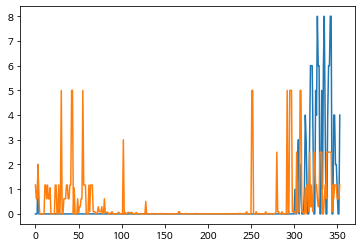

In [37]:
plt.plot('index', 'value(y_test)', data = tmp)
plt.plot('index', 'pred', data = tmp)

In [38]:
# text_representation = tree.export_text(tree1)
# text_representation

# max_depth 가 6이라고 해서 6개 변수를 모두 쓰진 않겠지만 이왕이면 다양한 변수를 썼으면 해서 일단 깊이를 6으로 했거든?
# 변수가 max_depth =1 일 때보단 다양한 변수를 썼는지 확인하기

## 북부분소 for 문

In [41]:
# 서부 분소의 train set X(입력변수만) 정의
nor_train_X = pd.DataFrame(scaler.fit_transform(X = nor2.iloc[:,4:], y = nor2[['건수']])) #train
nor_train_X.columns = ['평균기온', '일강수량', '평균풍속', '평균상대습도', '합계일사량', 'month']

In [42]:
# nor2['종류'].unique()

In [43]:
nor_train_X = nor_train_X.reset_index()

tmp_nor = nor2[['종류','건수']].reset_index().reset_index()
tmp_nor.drop(columns = ['index'], axis = 1,inplace = True)
tmp_nor.rename(columns = {'level_0' : 'index'}, inplace = True)

nor_train = pd.concat([tmp_nor, nor_train_X], axis = 1)

In [44]:
# test set 정규화
nor_test_X = pd.DataFrame(scaler.fit_transform(X = testnor.iloc[:,3:], y = testnor[['건수']]))
nor_test_X.columns = ['평균기온', '일강수량', '평균풍속', '평균상대습도', '합계일사량', 'month']
nor_test_X = nor_test_X.reset_index()
#
tmp_nor_test = testnor[['종류','건수']].reset_index().reset_index()
tmp_nor_test.drop(columns = ['index'], axis = 1,inplace = True)
tmp_nor_test.rename(columns = {'level_0' : 'index'}, inplace = True)

nor_test = pd.concat([tmp_nor_test, nor_test_X], axis = 1)
# nor_test

In [45]:
parameters ={
    # 'max_depth':[3,5,7,9,10,11],
    'max_depth' : [6,7,9,11,13,15],
    'max_features':[0.1,0.3,0.5,0.7,0.9]
}

In [46]:
nor_dic = {'nor1' : '농산물탈피기'
           ,'nor2' : '모우어'
           ,'nor3' : '보행경운기'
           ,'nor4' : '잔가지파쇄기'
           ,'nor5' :'콩정선기'}

In [48]:
for i in range(1,6):

  globals()['nor{}_X'.format(i)] = nor_train[nor_train['종류'] == nor_dic['nor{}'.format(i)]].iloc[:,4:]
  globals()['nor{}_y'.format(i)] = nor_train[nor_train['종류'] == nor_dic['nor{}'.format(i)]][['건수']]

  globals()['tree{}'.format(i)] = DecisionTreeRegressor(random_state = 3)
  globals()['tree{}'.format(i)].fit(globals()['nor{}_X'.format(i)],
                                    globals()['nor{}_y'.format(i)])

  globals()['nor{}_GS'.format(i)] = GridSearchCV(globals()['tree{}'.format(i)],
                                                  param_grid = parameters,
                                                  cv = 5, scoring = rmse_scorer)
  
  globals()['nor{}_GS'.format(i)].fit(globals()['nor{}_X'.format(i)], globals()['nor{}_y'.format(i)])

  par = globals()['nor{}_GS'.format(i)].best_params_
  #  print('max_depth :', par['max_depth'], '/ max features :', par['max_features'])

  globals()['tree{}'.format(i)] = DecisionTreeRegressor(random_state = 3, max_depth = par['max_depth'], max_features = par['max_features'])
  globals()['tree{}'.format(i)].fit(globals()['nor{}_X'.format(i)],
                                    globals()['nor{}_y'.format(i)])

  globals()['nor{}_X_test'.format(i)] = nor_test[nor_test['종류'] == nor_dic['nor{}'.format(i)]].iloc[:,4:]
  globals()['nor{}_y_test'.format(i)] = nor_test[nor_test['종류'] == nor_dic['nor{}'.format(i)]]['건수']

  globals()['nor{}_ypred'.format(i)] = globals()['tree{}'.format(i)].predict(globals()['nor{}_X_test'.format(i)])
  print('농기계 종류 : ', nor_dic['nor{}'.format(i)]
        ,'\n', 'max_depth :', par['max_depth']
        ,'\n', 'max features :', par['max_features'])

농기계 종류 :  농산물탈피기 
 max_depth : 6 
 max features : 0.1
농기계 종류 :  모우어 
 max_depth : 6 
 max features : 0.1
농기계 종류 :  보행경운기 
 max_depth : 6 
 max features : 0.1
농기계 종류 :  잔가지파쇄기 
 max_depth : 6 
 max features : 0.1
농기계 종류 :  콩정선기 
 max_depth : 6 
 max features : 0.1


In [ ]:
# index = list(range(0,354))

# tmp = {'index' : index,
#        'value(y_test)' : west4_y_test.to_list(),
#        'pred' : list(west4_ypred)}

# tmp = pd.DataFrame(tmp)

In [ ]:
plt.plot('index', 'value(y_test)', data = tmp)
plt.plot('index', 'pred', data = tmp)

In [ ]:
# text_representation = tree.export_text(tree1)
# text_representation

# max_depth 가 6이라고 해서 6개 변수를 모두 쓰진 않겠지만 이왕이면 다양한 변수를 썼으면 해서 일단 깊이를 6으로 했거든?
# 변수가 max_depth =1 일 때보단 다양한 변수를 썼는지 확인하기

## 중앙임대사업소

In [63]:
# 서부 분소의 train set X(입력변수만) 정의
cen_train_X = pd.DataFrame(scaler.fit_transform(X = cen2.iloc[:,4:], y = cen2[['건수']])) #train
cen_train_X.columns = ['평균기온', '일강수량', '평균풍속', '평균상대습도', '합계일사량', 'month']

In [64]:
cen_train_X = cen_train_X.reset_index()

tmp_cen = cen2[['종류','건수']].reset_index().reset_index()
tmp_cen.drop(columns = ['index'], axis = 1,inplace = True)
tmp_cen.rename(columns = {'level_0' : 'index'}, inplace = True)

cen_train = pd.concat([tmp_cen, cen_train_X], axis = 1)

In [68]:
# test set 정규화
cen_test_X = pd.DataFrame(scaler.fit_transform(X = testcen.iloc[:,3:], y = testcen[['건수']]))
cen_test_X .columns = ['평균기온', '일강수량', '평균풍속', '평균상대습도', '합계일사량', 'month']
cen_test_X  = cen_test_X .reset_index()
#
tmp_cen_test = testcen[['종류','건수']].reset_index().reset_index()
tmp_cen_test.drop(columns = ['index'], axis = 1,inplace = True)
tmp_cen_test.rename(columns = {'level_0' : 'index'}, inplace = True)

cen_test = pd.concat([tmp_cen_test, cen_test_X], axis = 1)
cen_test

,index,종류,건수,index,평균기온,일강수량,평균풍속,평균상대습도,합계일사량,month
0,0,곡물정선기,0.0,0,0.194124,0.0,0.370201,0.466888,0.241767,0.0
1,1,승용관리기,0.0,1,0.194124,0.0,0.370201,0.466888,0.241767,0.0
2,2,콩정선기,0.0,2,0.194124,0.0,0.370201,0.466888,0.241767,0.0
3,3,보행경운기,0.0,3,0.194124,0.0,0.370201,0.466888,0.241767,0.0
4,4,잔가지파쇄기,0.0,4,0.194124,0.0,0.370201,0.466888,0.241767,0.0
...,...,...,...,...,...,...,...,...,...,...
4243,4243,농산물탈피기,0.0,4243,0.377222,0.0,0.151688,0.471810,0.266951,1.0
4244,4244,농업용고소작업차,0.0,4244,0.377222,0.0,0.151688,0.471810,0.266951,1.0
4245,4245,농업용동력운반차,0.0,4245,0.377222,0.0,0.151688,0.471810,0.266951,1.0
4246,4246,동력분무기,0.0,4246,0.377222,0.0,0.151688,0.471810,0.266951,1.0


In [54]:
parameters ={
    # 'max_depth':[3,5,7,9,10,11],
    'max_depth' : [6,7,9,11,13,15],
    'max_features':[0.1,0.3,0.5,0.7,0.9]
}

In [56]:
cen_dic = {'cen1' : '곡물정선기'
           ,'cen2' : '그레이더'
           ,'cen3' : '농산물탈피기'
           ,'cen4' : '농업용고소작업차'
           ,'cen5' : '농업용동력운반차'
           ,'cen6' : '동력분무기'
           ,'cen7' : '동력예취기'
           ,'cen8' : '동력파종기'
           ,'cen9' : '보행경운기'
           ,'cen10' : '승용관리기'
           ,'cen11' : '잔가지파쇄기'
           ,'cen12' : '콩정선기'}

In [70]:
for i in range(1,13):

  globals()['cen{}_X'.format(i)] = cen_train[cen_train['종류'] == cen_dic['cen{}'.format(i)]].iloc[:,4:]
  globals()['cen{}_y'.format(i)] = cen_train[cen_train['종류'] == cen_dic['cen{}'.format(i)]][['건수']]

  globals()['tree{}'.format(i)] = DecisionTreeRegressor(random_state = 3)
  globals()['tree{}'.format(i)].fit(globals()['cen{}_X'.format(i)],
                                    globals()['cen{}_y'.format(i)])

  globals()['cen{}_GS'.format(i)] = GridSearchCV(globals()['tree{}'.format(i)],
                                                  param_grid = parameters,
                                                  cv = 5, scoring = rmse_scorer)
  
  globals()['cen{}_GS'.format(i)].fit(globals()['cen{}_X'.format(i)], globals()['cen{}_y'.format(i)])

  par = globals()['cen{}_GS'.format(i)].best_params_
  #  print('max_depth :', par['max_depth'], '/ max features :', par['max_features'])

  globals()['tree{}'.format(i)] = DecisionTreeRegressor(random_state = 3, max_depth = par['max_depth'], max_features = par['max_features'])
  globals()['tree{}'.format(i)].fit(globals()['cen{}_X'.format(i)],
                                    globals()['cen{}_y'.format(i)])

  globals()['cen{}_X_test'.format(i)] = cen_test[cen_test['종류'] == cen_dic['cen{}'.format(i)]].iloc[:,4:]
  globals()['cen{}_y_test'.format(i)] = cen_test[cen_test['종류'] == cen_dic['cen{}'.format(i)]]['건수']

  globals()['cen{}_ypred'.format(i)] = globals()['tree{}'.format(i)].predict(globals()['cen{}_X_test'.format(i)])
  print('농기계 종류 : ', cen_dic['cen{}'.format(i)]
        ,'\n', 'max_depth :', par['max_depth']
        ,'\n', 'max features :', par['max_features'])

농기계 종류 :  곡물정선기 
 max_depth : 6 
 max features : 0.1
농기계 종류 :  그레이더 
 max_depth : 6 
 max features : 0.1
농기계 종류 :  농산물탈피기 
 max_depth : 6 
 max features : 0.1
농기계 종류 :  농업용고소작업차 
 max_depth : 6 
 max features : 0.1
농기계 종류 :  농업용동력운반차 
 max_depth : 6 
 max features : 0.1
농기계 종류 :  동력분무기 
 max_depth : 6 
 max features : 0.1
농기계 종류 :  동력예취기 
 max_depth : 6 
 max features : 0.1
농기계 종류 :  동력파종기 
 max_depth : 6 
 max features : 0.1
농기계 종류 :  보행경운기 
 max_depth : 6 
 max features : 0.1
농기계 종류 :  승용관리기 
 max_depth : 6 
 max features : 0.1
농기계 종류 :  잔가지파쇄기 
 max_depth : 6 
 max features : 0.1
농기계 종류 :  콩정선기 
 max_depth : 6 
 max features : 0.1


In [ ]:
# index = list(range(0,354))

# tmp = {'index' : index,
#        'value(y_test)' : west4_y_test.to_list(),
#        'pred' : list(west4_ypred)}

# tmp = pd.DataFrame(tmp)

In [ ]:
plt.plot('index', 'value(y_test)', data = tmp)
plt.plot('index', 'pred', data = tmp)